<a href="https://colab.research.google.com/github/mjavadpur/Regression/blob/main/RegSession4MJavadpur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#####
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
#####
from sklearn.neighbors import LocalOutlierFactor
#####
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report ,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "status" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Import**  **dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Workshop/Regression/BreastCancer/gbsg.csv')
df

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0
...,...,...,...,...,...,...,...,...,...,...,...,...
681,682,586,51,0,30,3,2,1152,38,1,1760,0
682,683,1273,64,1,26,2,2,1356,1144,1,1152,0
683,684,1525,57,1,35,3,1,1490,209,1,1342,0
684,685,736,44,0,21,2,3,1600,70,0,629,0


In [4]:
df.head()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


In [5]:
df.describe()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,198.175427,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,172.250000,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,343.500000,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,514.750000,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,686.000000,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null    int64
 6   nodes       686 non-null    int64
 7   pgr         686 non-null    int64
 8   er          686 non-null    int64
 9   hormon      686 non-null    int64
 10  rfstime     686 non-null    int64
 11  status      686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


In [7]:
df.columns

Index(['Unnamed: 0', 'pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr',
       'er', 'hormon', 'rfstime', 'status'],
      dtype='object')

In [8]:
df.drop('Unnamed: 0',axis = 1 , inplace=True)
df.drop('pid',axis = 1 , inplace=True)

In [9]:
df.shape

(686, 10)

# Check missing values

In [10]:
df.isnull().sum()

age        0
meno       0
size       0
grade      0
nodes      0
pgr        0
er         0
hormon     0
rfstime    0
status     0
dtype: int64

# Correlation plot

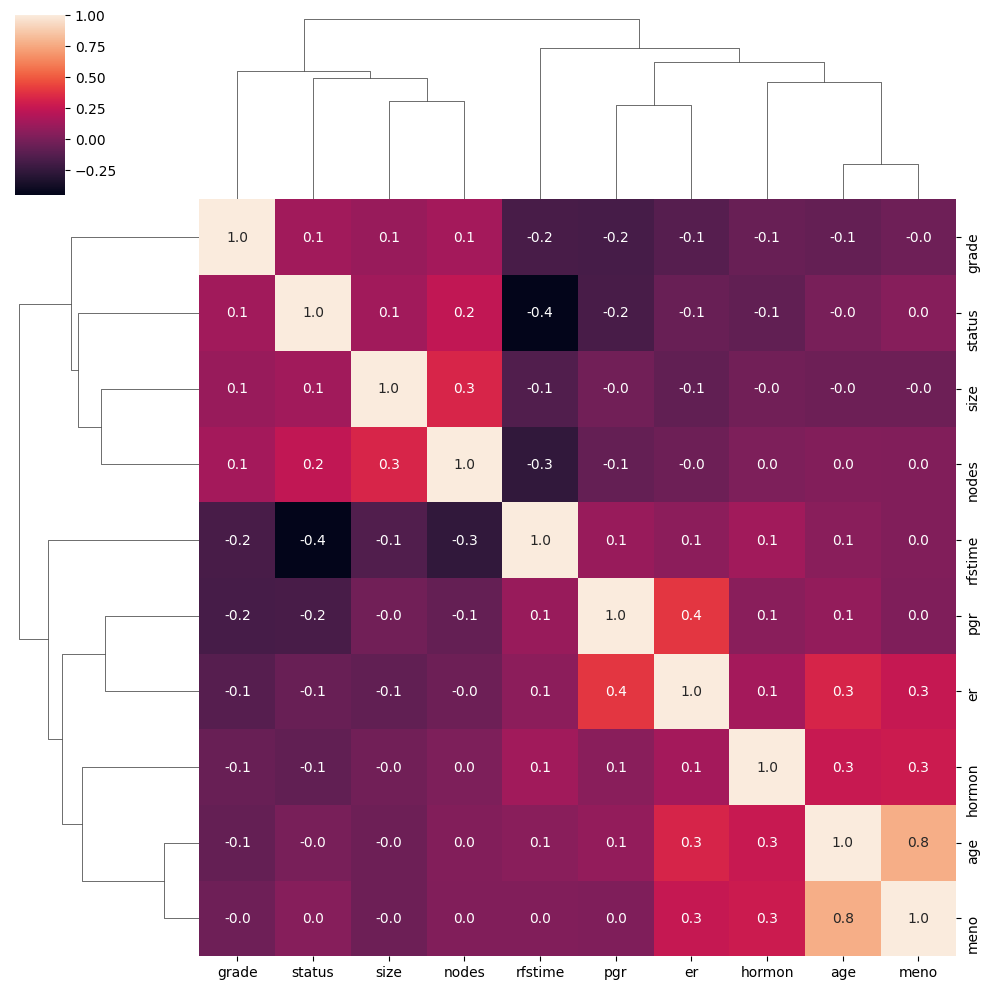

In [11]:
sns.clustermap(df.corr() , annot=True , fmt='.1f')

# KDE plot
We use this plot to examine the distribution of the data

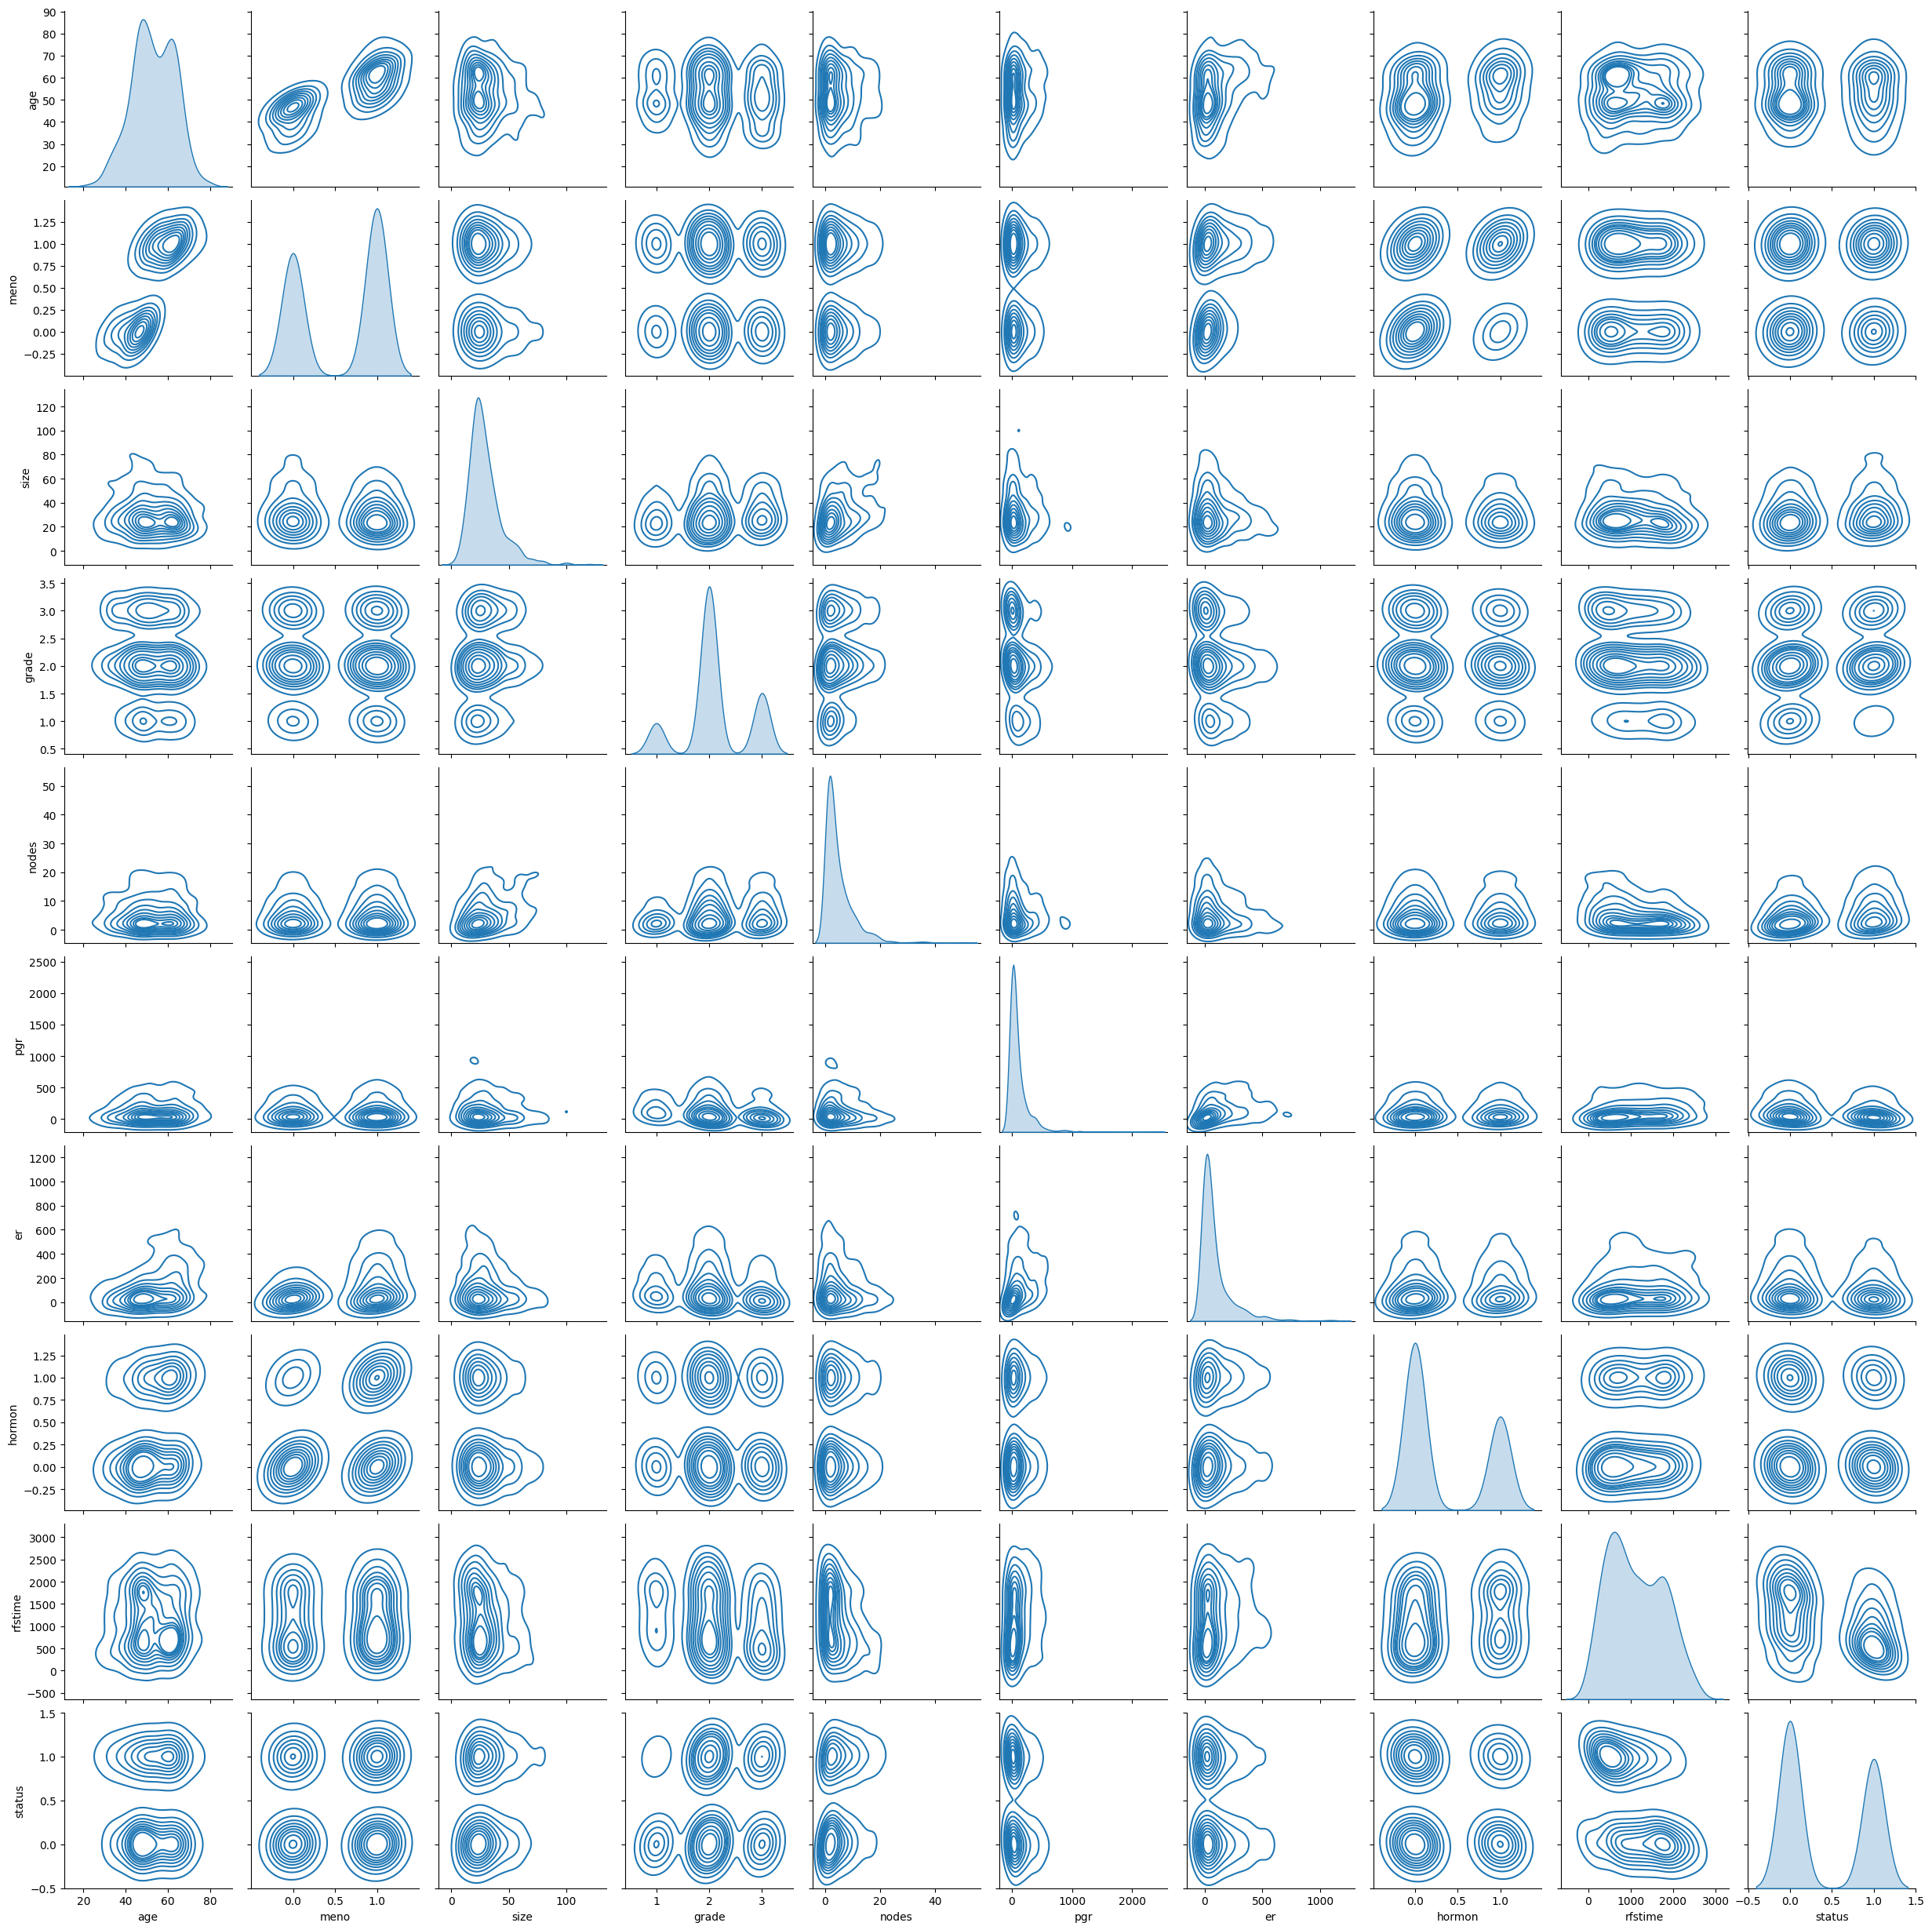

In [12]:
sns.pairplot(df , kind="kde")

# Boxplot

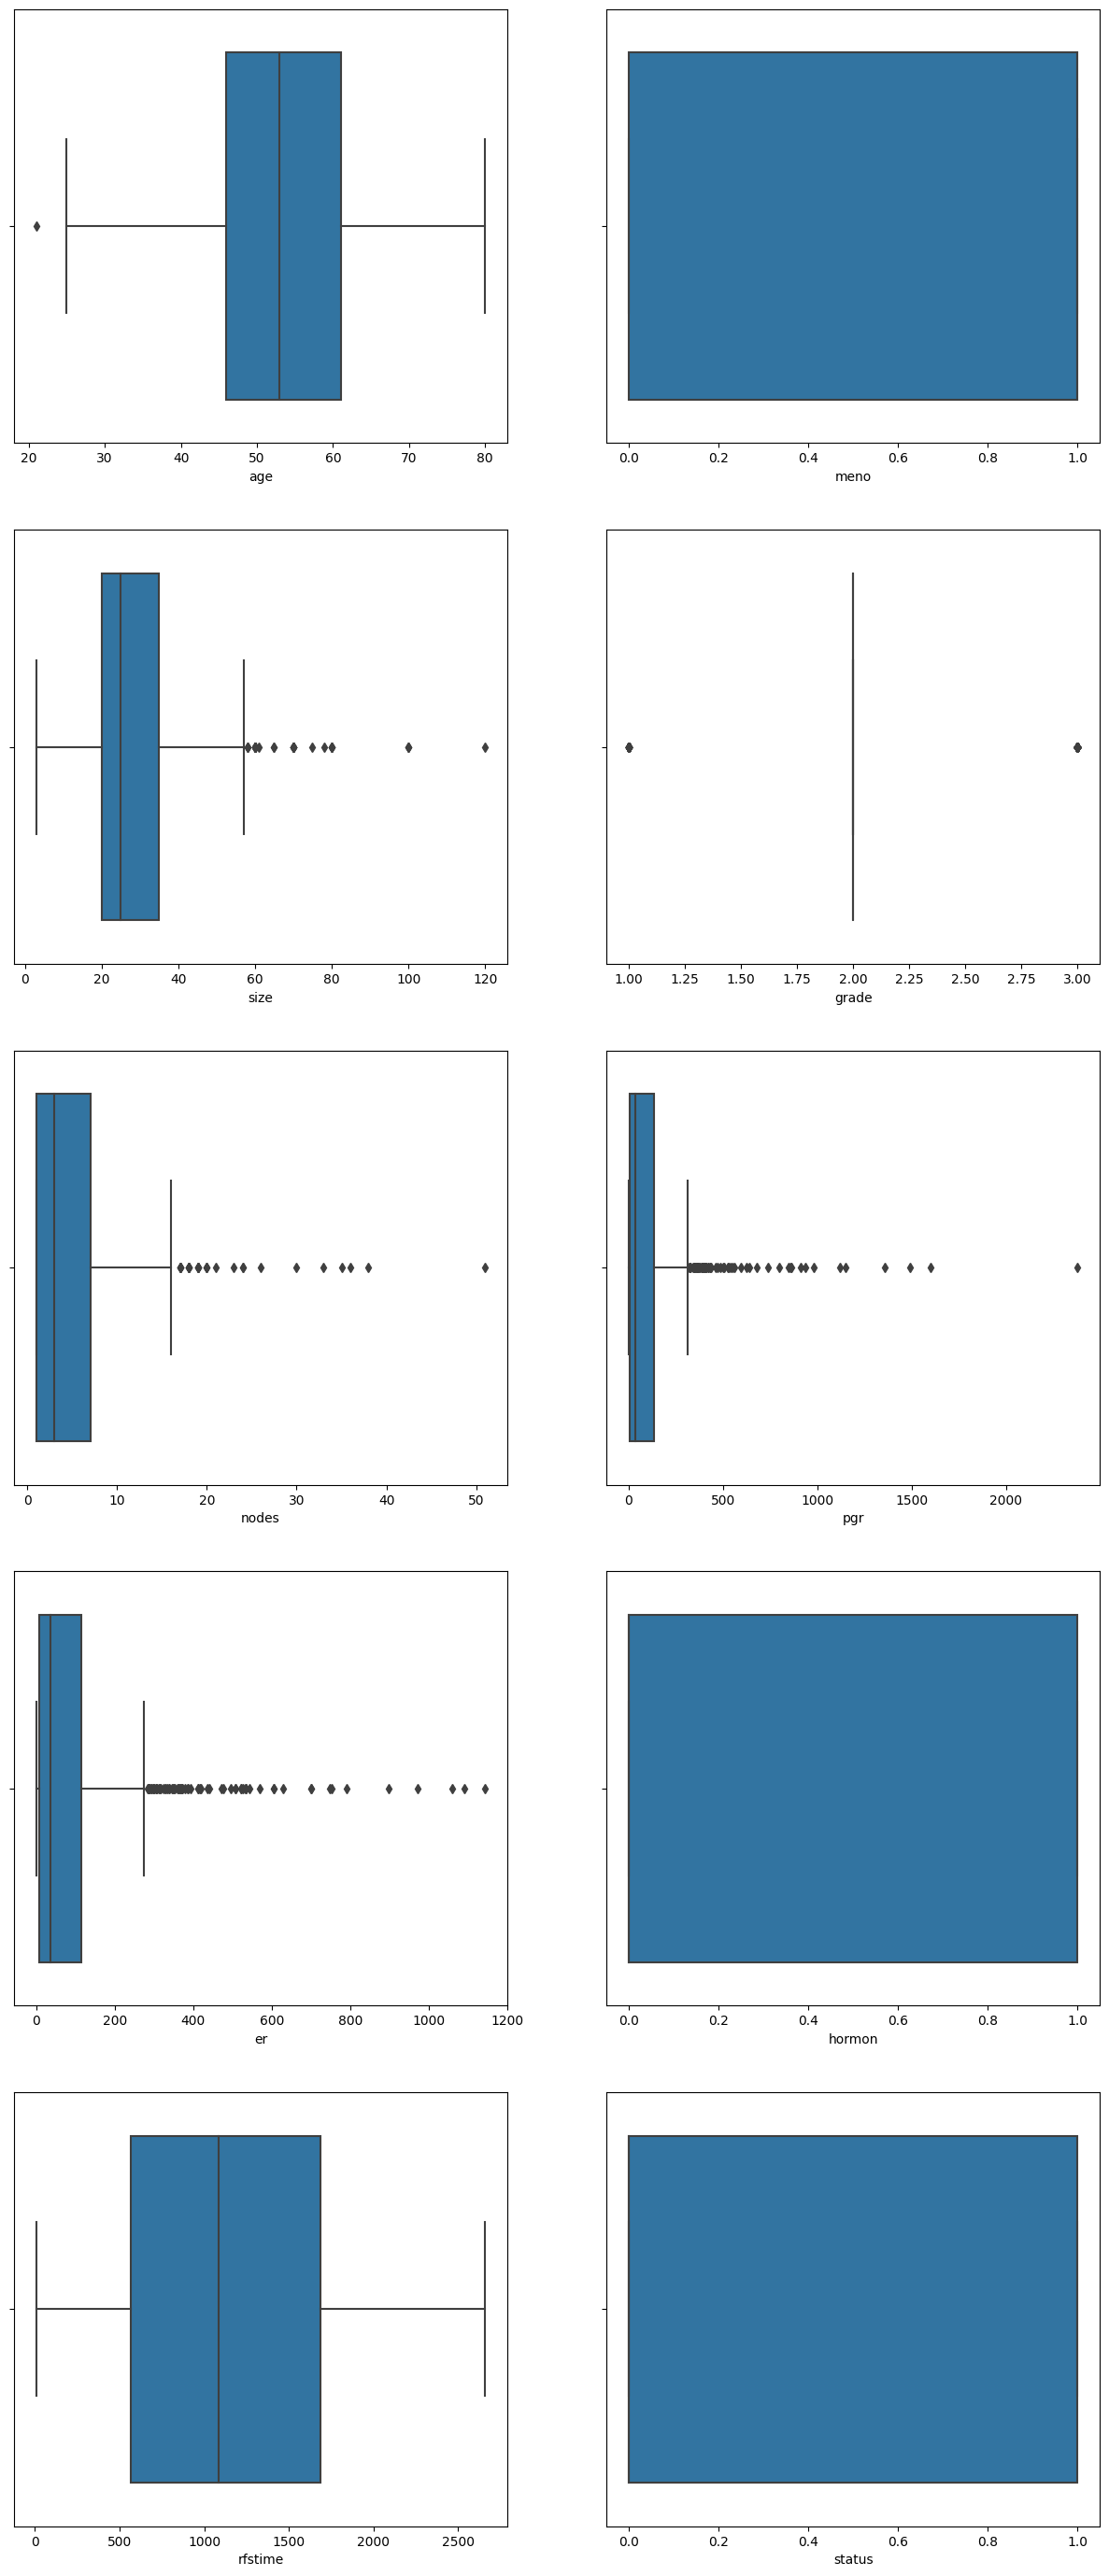

In [13]:
features = df.drop('status',axis=1)
features = df.columns.tolist()

fig , ax = plt.subplots(nrows= int(np.ceil(len(features)/2)) , ncols=2 , figsize=(15,35))

for i , var in enumerate(features):
    x = i//2
    y = i%2
    sns.boxplot(data=df , x=var , ax=ax[x,y])

# Noise detecting

In [29]:
lof = LocalOutlierFactor(n_neighbors=5)
df['lof_score'] = lof.fit_predict(df[features])
outliers = df[df['lof_score'] == -1]

print(f"Found {len(outliers)} outliers at indices {outliers.index.tolist()}")

df.drop('lof_score' , axis=1 , inplace=True) #Returning the data frame to the previous state

Found 40 outliers at indices [32, 48, 60, 79, 87, 98, 114, 120, 136, 194, 199, 254, 288, 321, 337, 348, 369, 396, 404, 423, 424, 431, 445, 448, 453, 454, 462, 476, 491, 505, 520, 548, 631, 669, 671, 675, 680, 682, 684, 685]


In [30]:
# df = df.drop([28, 53, 85, 96, 111, 220, 246, 248, 272, 297]) 

# Make prediction model 

## Apart the train and test data

In [31]:
def find_best_lasso_model(X_train , y_train, X_test, y_test):
    from tqdm.contrib import itertools

    hyperParams = pd.DataFrame({"alpha":[],"accuracy_score":[]})

    for i in itertools.product(range(100)):
        alpha = i[0]/100
        LR = Lasso(alpha = alpha)
        LR.fit(X_train , y_train)

        y_pred = LR.predict(X_test)
        y_pred = (y_pred > 0.5).astype(int) #Define threshold to return discrete values
        accuracy_score = metrics.accuracy_score(y_test , y_pred)

        new_hp = pd.DataFrame({"alpha":[alpha],"accuracy_score":[accuracy_score]})

        hyperParams = hyperParams.append(new_hp)

    result = hyperParams['accuracy_score'].values
    best_HP = hyperParams.iloc[result.argmax(),:]

    best_alpha = best_HP['alpha']
    best_accuracy_score = best_HP['accuracy_score']
    
    LR = Lasso(alpha = best_alpha)
    LR.fit(X_train , y_train)
    y_pred = LR.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int) #Define threshold to return discrete values
        

    return LR, best_alpha, best_accuracy_score, y_pred

In [32]:
def my_model(df):
    #Features
    x = df.drop('status',axis=1)
    #status
    y = df['status']
    #Prepare the train data and test data and the size for testing
    X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=0)

    print('X_train shape : ' , X_train.shape)
    print('X_test shape : ' , X_test.shape)
    print('y_train shape : ' , y_train.shape)
    print('y_test shape : ' , y_test.shape , '\n')

    print('X_train info' , X_train.info() , '\n')
    print('X_train info' , X_test.info())

    LR, alpha, accuracy_score, y_pred = find_best_lasso_model(X_train , y_train, X_test, y_test)

    #accuracy score
    # y_pred = LR.predict(X_test)
    # y_pred = (y_pred > 0.5).astype(int) #Define threshold to return discrete values
    # accuracy_score = metrics.accuracy_score(y_test , y_pred)
    print('best accuracy score : ' , accuracy_score)
    print('best alpha : ' , alpha)

    #cross val score
    KF = KFold(n_splits=5 , shuffle=True , random_state=0)
    CVS = cross_val_score(LR , X_test, y_pred , cv=KF)
    print('Cross val score : ' , CVS)

    #report
    print(classification_report(y_test,y_pred))

    #Confusion matrix
    print('Confusion matrix : ')
    print(metrics.confusion_matrix(y_test,y_pred))

In [33]:
my_model(df)

X_train shape :  (617, 9)
X_test shape :  (69, 9)
y_train shape :  (617,)
y_test shape :  (69,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 236 to 684
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      617 non-null    int64
 1   meno     617 non-null    int64
 2   size     617 non-null    int64
 3   grade    617 non-null    int64
 4   nodes    617 non-null    int64
 5   pgr      617 non-null    int64
 6   er       617 non-null    int64
 7   hormon   617 non-null    int64
 8   rfstime  617 non-null    int64
dtypes: int64(9)
memory usage: 48.2 KB
X_train info None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 593 to 233
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      69 non-null     int64
 1   meno     69 non-null     int64
 2   size     69 non-null     int64
 3   grade    69 non-null     int64
 4   nodes    69 non

  0%|          | 0/100 [00:00<?, ?it/s]

best accuracy score :  0.7536231884057971
best alpha :  0.01
Cross val score :  [0.67315474 0.76939499 0.72490471 0.6527033  0.3902577 ]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        42
           1       0.67      0.74      0.70        27

    accuracy                           0.75        69
   macro avg       0.74      0.75      0.75        69
weighted avg       0.76      0.75      0.76        69

Confusion matrix : 
[[32 10]
 [ 7 20]]


In [34]:
df_drop_outliers = df.drop(outliers.index,axis = 0)
my_model(df_drop_outliers)

X_train shape :  (581, 9)
X_test shape :  (65, 9)
y_train shape :  (581,)
y_test shape :  (65,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 530 to 591
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      581 non-null    int64
 1   meno     581 non-null    int64
 2   size     581 non-null    int64
 3   grade    581 non-null    int64
 4   nodes    581 non-null    int64
 5   pgr      581 non-null    int64
 6   er       581 non-null    int64
 7   hormon   581 non-null    int64
 8   rfstime  581 non-null    int64
dtypes: int64(9)
memory usage: 45.4 KB
X_train info None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 184 to 648
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      65 non-null     int64
 1   meno     65 non-null     int64
 2   size     65 non-null     int64
 3   grade    65 non-null     int64
 4   nodes    65 non

  0%|          | 0/100 [00:00<?, ?it/s]

best accuracy score :  0.7538461538461538
best alpha :  0.0
Cross val score :  [0.72793438 0.30374453 0.2940655  0.34948111 0.64589169]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.70      0.58      0.64        24

    accuracy                           0.75        65
   macro avg       0.74      0.72      0.73        65
weighted avg       0.75      0.75      0.75        65

Confusion matrix : 
[[35  6]
 [10 14]]
